## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  41.630189  1334.101229  0.726989   8.942963   970.792772
1  32.092559  1212.667844  0.443740   8.781336   539.153277
2  73.891716   214.985730  0.313215  10.845046    99.894857
3   9.360885  1753.989184  0.917778   6.695928  1609.742501
4  71.718591  1392.198499  0.909210   1.047923  1267.777362


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0193664	total: 57.1ms	remaining: 57.1s
1:	learn: 1.0075150	total: 57.6ms	remaining: 28.8s
2:	learn: 0.9934577	total: 58ms	remaining: 19.3s
3:	learn: 0.9824073	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9687644	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9556605	total: 59.6ms	remaining: 9.88s
6:	learn: 0.9423105	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9301339	total: 60.5ms	remaining: 7.5s
8:	learn: 0.9173346	total: 60.9ms	remaining: 6.71s
9:	learn: 0.9042475	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8896996	total: 61.9ms	remaining: 5.56s
11:	learn: 0.8745797	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8628034	total: 63ms	remaining: 4.78s
13:	learn: 0.8487824	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8350031	total: 63.7ms	remaining: 4.18s
15:	learn: 0.8212726	total: 64.1ms	remaining: 3.94s
16:	learn: 0.8095196	total: 64.7ms	remaining: 3.74s
17:	learn: 0.7973092	total: 65.3ms	remaining: 3.56s
18:	learn: 0.7876618	total: 65.7ms	remaining: 3.3

81:	learn: 0.3452511	total: 92ms	remaining: 1.03s
82:	learn: 0.3405483	total: 92.6ms	remaining: 1.02s
83:	learn: 0.3365344	total: 93ms	remaining: 1.01s
84:	learn: 0.3322205	total: 93.3ms	remaining: 1s
85:	learn: 0.3287559	total: 93.8ms	remaining: 997ms
86:	learn: 0.3255579	total: 94.1ms	remaining: 987ms
87:	learn: 0.3220075	total: 94.5ms	remaining: 979ms
88:	learn: 0.3183670	total: 94.9ms	remaining: 972ms
89:	learn: 0.3154603	total: 95.3ms	remaining: 963ms
90:	learn: 0.3118151	total: 95.7ms	remaining: 956ms
91:	learn: 0.3077764	total: 96.1ms	remaining: 949ms
92:	learn: 0.3042996	total: 96.7ms	remaining: 943ms
93:	learn: 0.3002934	total: 97.2ms	remaining: 937ms
94:	learn: 0.2968653	total: 97.5ms	remaining: 929ms
95:	learn: 0.2936086	total: 98ms	remaining: 923ms
96:	learn: 0.2901189	total: 98.6ms	remaining: 918ms
97:	learn: 0.2867053	total: 99.1ms	remaining: 912ms
98:	learn: 0.2825744	total: 99.5ms	remaining: 905ms
99:	learn: 0.2790961	total: 99.9ms	remaining: 899ms
100:	learn: 0.2761053

266:	learn: 0.0533411	total: 170ms	remaining: 466ms
267:	learn: 0.0529192	total: 170ms	remaining: 465ms
268:	learn: 0.0524681	total: 171ms	remaining: 464ms
269:	learn: 0.0520223	total: 171ms	remaining: 463ms
270:	learn: 0.0515777	total: 172ms	remaining: 462ms
271:	learn: 0.0511358	total: 172ms	remaining: 460ms
272:	learn: 0.0506953	total: 172ms	remaining: 459ms
273:	learn: 0.0503762	total: 173ms	remaining: 458ms
274:	learn: 0.0499886	total: 173ms	remaining: 457ms
275:	learn: 0.0496200	total: 174ms	remaining: 456ms
276:	learn: 0.0492015	total: 174ms	remaining: 454ms
277:	learn: 0.0488354	total: 174ms	remaining: 453ms
278:	learn: 0.0484760	total: 175ms	remaining: 452ms
279:	learn: 0.0481237	total: 175ms	remaining: 451ms
280:	learn: 0.0477318	total: 176ms	remaining: 449ms
281:	learn: 0.0473801	total: 176ms	remaining: 449ms
282:	learn: 0.0470533	total: 177ms	remaining: 447ms
283:	learn: 0.0466790	total: 177ms	remaining: 446ms
284:	learn: 0.0463635	total: 177ms	remaining: 445ms
285:	learn: 

438:	learn: 0.0188911	total: 246ms	remaining: 315ms
439:	learn: 0.0188301	total: 247ms	remaining: 314ms
440:	learn: 0.0187655	total: 247ms	remaining: 313ms
441:	learn: 0.0186820	total: 247ms	remaining: 312ms
442:	learn: 0.0186000	total: 248ms	remaining: 312ms
443:	learn: 0.0185099	total: 248ms	remaining: 311ms
444:	learn: 0.0184515	total: 249ms	remaining: 311ms
445:	learn: 0.0183556	total: 250ms	remaining: 310ms
446:	learn: 0.0182685	total: 250ms	remaining: 310ms
447:	learn: 0.0181795	total: 251ms	remaining: 309ms
448:	learn: 0.0180832	total: 251ms	remaining: 308ms
449:	learn: 0.0180004	total: 252ms	remaining: 307ms
450:	learn: 0.0179019	total: 252ms	remaining: 307ms
451:	learn: 0.0178203	total: 252ms	remaining: 306ms
452:	learn: 0.0177310	total: 253ms	remaining: 305ms
453:	learn: 0.0176398	total: 253ms	remaining: 304ms
454:	learn: 0.0175448	total: 253ms	remaining: 304ms
455:	learn: 0.0174678	total: 254ms	remaining: 303ms
456:	learn: 0.0173832	total: 254ms	remaining: 302ms
457:	learn: 

602:	learn: 0.0091165	total: 320ms	remaining: 211ms
603:	learn: 0.0090795	total: 321ms	remaining: 210ms
604:	learn: 0.0090528	total: 321ms	remaining: 210ms
605:	learn: 0.0090124	total: 322ms	remaining: 209ms
606:	learn: 0.0089768	total: 322ms	remaining: 208ms
607:	learn: 0.0089619	total: 322ms	remaining: 208ms
608:	learn: 0.0089210	total: 323ms	remaining: 207ms
609:	learn: 0.0088867	total: 323ms	remaining: 207ms
610:	learn: 0.0088453	total: 324ms	remaining: 206ms
611:	learn: 0.0088307	total: 325ms	remaining: 206ms
612:	learn: 0.0087913	total: 325ms	remaining: 205ms
613:	learn: 0.0087519	total: 326ms	remaining: 205ms
614:	learn: 0.0087178	total: 326ms	remaining: 204ms
615:	learn: 0.0086864	total: 326ms	remaining: 203ms
616:	learn: 0.0086555	total: 327ms	remaining: 203ms
617:	learn: 0.0086254	total: 327ms	remaining: 202ms
618:	learn: 0.0085959	total: 328ms	remaining: 202ms
619:	learn: 0.0085647	total: 328ms	remaining: 201ms
620:	learn: 0.0085359	total: 328ms	remaining: 200ms
621:	learn: 

837:	learn: 0.0040951	total: 427ms	remaining: 82.6ms
838:	learn: 0.0040855	total: 428ms	remaining: 82.1ms
839:	learn: 0.0040756	total: 428ms	remaining: 81.6ms
840:	learn: 0.0040620	total: 429ms	remaining: 81.1ms
841:	learn: 0.0040525	total: 429ms	remaining: 80.5ms
842:	learn: 0.0040329	total: 430ms	remaining: 80ms
843:	learn: 0.0040230	total: 430ms	remaining: 79.5ms
844:	learn: 0.0040120	total: 431ms	remaining: 79ms
845:	learn: 0.0039936	total: 431ms	remaining: 78.5ms
846:	learn: 0.0039784	total: 432ms	remaining: 78ms
847:	learn: 0.0039688	total: 432ms	remaining: 77.4ms
848:	learn: 0.0039559	total: 432ms	remaining: 76.9ms
849:	learn: 0.0039453	total: 433ms	remaining: 76.4ms
850:	learn: 0.0039364	total: 433ms	remaining: 75.8ms
851:	learn: 0.0039270	total: 433ms	remaining: 75.3ms
852:	learn: 0.0039177	total: 434ms	remaining: 74.8ms
853:	learn: 0.0039029	total: 434ms	remaining: 74.2ms
854:	learn: 0.0038925	total: 435ms	remaining: 73.7ms
855:	learn: 0.0038798	total: 435ms	remaining: 73.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

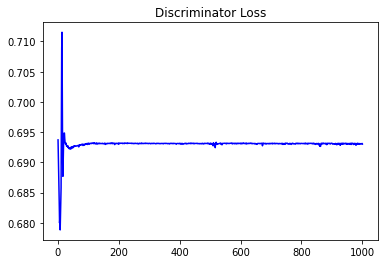

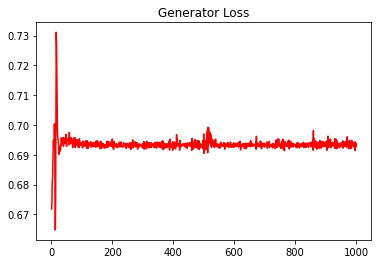

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0038339737283580866


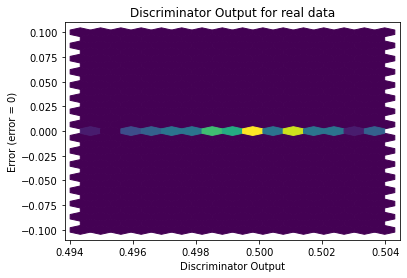

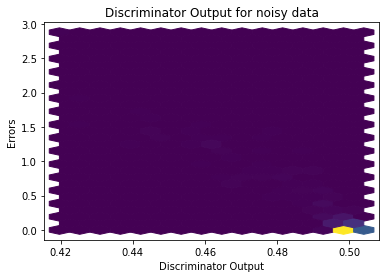

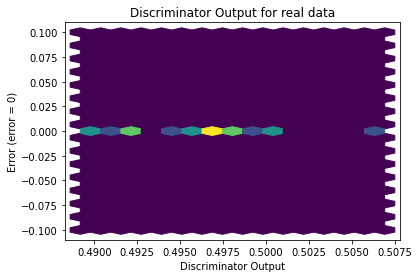

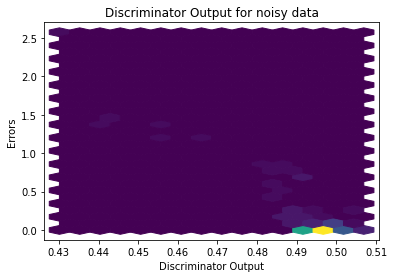

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


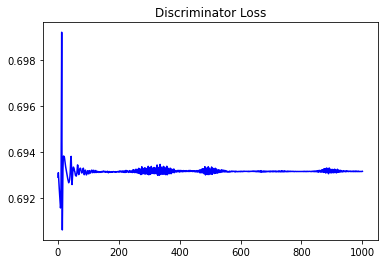

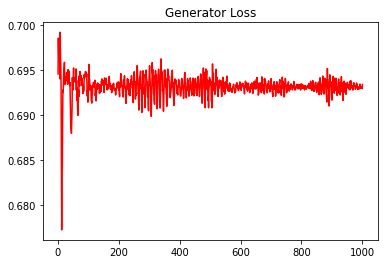

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007377355984089303


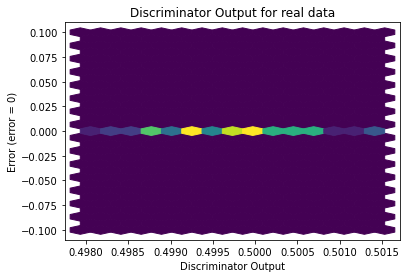

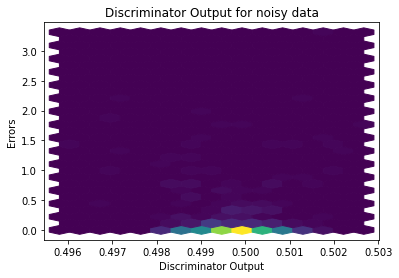

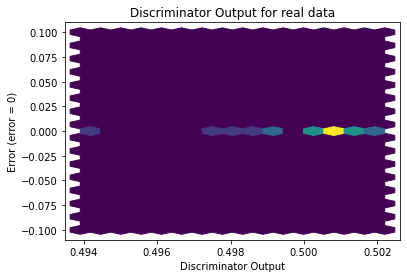

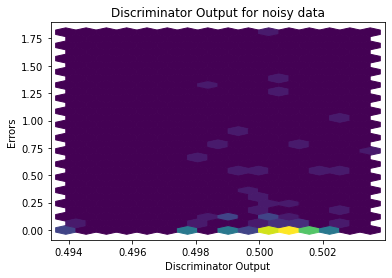

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0379]], requires_grad=True)
